In [11]:

import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data 
from datetime import date

import env
import os

import warnings
warnings.filterwarnings("ignore")

In [3]:

def get_db_url(data_base):
    return (f'mysql+pymysql://{env.username}:{env.password}@{env.host}/{data_base}')

In [ ]:
""" 
1
- Null Hypothesis: There is no change in latency since we switched ISPs
- Alt. Hypo: There is some change in latency.
- type 1 error: The conclusion is there is a difference but there actually is not
- Type 2 error: The conclustion is there is no difference but there actually is.

2
- Null Hypo: Visitors to the website spend the same short amount of time as the old crapy website. 
- Alt. Hypo: Visitors spend different amount of time (more)






"""

In [ ]:
#1

In [ ]:
#Is there a difference in grades of students on the second floor compared to grades of all students?:
#One sample T-test two tail 

In [ ]:
#Are adults who drink milk taller than adults who dont drink milk?
#Two sample T-test one tail

In [ ]:
#Is the the price of gas higher in texas or in new mexico?
#Two sample T-test one tail 

In [ ]:
#Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
#ANOVA

In [ ]:
#2

In [87]:
"""Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance."""

office1= 90 
office2= 100
alpha= .05

In [88]:
t, p = stats.ttest_ind_from_stats(office1,15, 40, office2,20,50, equal_var=False) 
t, p 

(-2.7091418459143854, 0.00811206270346016)

In [82]:
#the long way to do it:

office1 = stats.norm(90, 15).rvs(40)
office2 = stats.norm(100, 20).rvs(50)

In [83]:
t , p = stats.levene(office1, office2)

In [84]:
t , p = stats.ttest_ind(office1, office2, equal_var=False)

In [89]:
if  (p  < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [ ]:
#3

In [14]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [19]:
mpg["average_mileage"] = (mpg["hwy"] + mpg['cty']) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [24]:
mpg2008 = mpg[mpg.year == 2008].average_mileage
mpg1999 = mpg[mpg.year == 1999].average_mileage
mpg1999.shape

(117,)

In [ ]:
#Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

<AxesSubplot:>

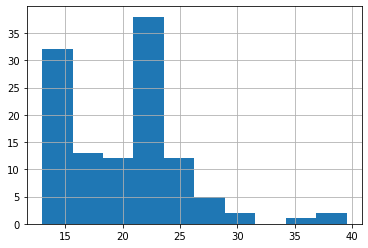

In [21]:
mpg1999.hist()

<AxesSubplot:>

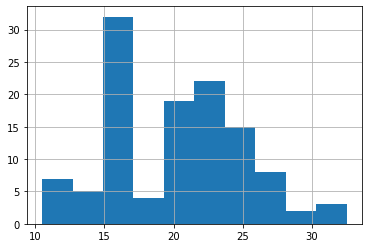

In [22]:
mpg2008.hist()

In [64]:
alpha = .05
mpg1999mean= mpg1999.mean()
mpg2008mean= mpg2008.mean()
mpg1999mean , mpg2008mean

(20.22222222222222, 20.076923076923077)

In [65]:
stat, pval = stats.levene(mpg1999 , mpg2008)
pval #var is equal enough 

0.855517569468803

In [66]:
t, p = stats.ttest_ind(mpg1999, mpg2008)
t, p 


(0.21960177245940962, 0.8263744040323578)

In [67]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
#must except null hypo. Pval is greater than alpha 

In [61]:
mpgCompact = mpg[mpg["class"] == "compact"].average_mileage
mpgTotal = mpg.average_mileage.mean()
mpgTotal, mpgCompact

(20.14957264957265,
 1      23.5
 2      25.0
 3      25.5
 4      25.5
 5      21.0
 6      22.0
 7      22.5
 8      22.0
 9      20.5
 10     24.0
 11     23.0
 12     20.0
 13     21.0
 14     21.0
 15     20.0
 142    25.0
 143    23.0
 170    22.5
 171    23.5
 172    22.0
 173    23.5
 187    24.0
 188    25.0
 189    26.0
 190    26.5
 191    22.0
 192    22.0
 193    22.5
 194    27.0
 195    28.5
 196    30.5
 197    32.5
 198    30.5
 208    25.0
 209    22.5
 210    25.0
 211    25.5
 212    20.5
 213    38.5
 214    25.0
 215    22.5
 216    25.5
 217    25.0
 218    25.0
 219    25.0
 220    19.5
 221    20.5
 Name: average_mileage, dtype: float64)

In [78]:
tstat, pval = stats.ttest_1samp(mpgCompact , mpgTotal)
tstat, pval

(7.896888573132535, 4.1985637943171336e-10)

In [79]:
if (t > 0) and ((pval/2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we fail to reject the null hypothesis


In [ ]:
#we can reject null hypothesis, compact mpg is greater than total avg. Tstat is greater than zero and alpha is less than alpha.

In [45]:
mpg['is_automatic']=mpg.trans.str.contains("auto")
mpg["is_manula"] = mpg.trans.str.contains("manual")
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic,is_manula
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,False
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False,True
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False,True
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True,False
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True,False


In [68]:
mpgAuto = mpg[mpg.is_automatic].average_mileage
mpgManula = mpg[mpg.is_manula].average_mileage
mpgManula

2      25.0
3      25.5
6      22.0
8      22.0
10     24.0
13     21.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
52     15.5
56     14.0
65     14.0
69     14.0
70     10.5
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
99     17.0
100    30.5
102    28.5
103    26.0
105    30.0
108    25.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
121    20.0
122    20.5
142    25.0
145    27.5
146    23.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
206    16.5
208    25.0
210    25.0
212    20.5
213    38.5
214    25.0
217    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
231    25.0
233    22.0
Name: average_mileage, dtype: float64

In [55]:
stat, pval = stats.levene(mpgAuto, mpgManula)
pval #close enough

0.6545276355131857

In [59]:
t, p = stats.ttest_ind(mpgManula, mpgAuto)
t, p

(4.593437735750014, 3.5771872005728416e-06)

In [60]:
if (t > 0) and ((p / 2) < alpha):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


In [ ]:
#we can reject the null hypo. Manual cars get better gas mileage than automatic cars. Tstat is greater than zero and pval is less than alpha.

In [ ]:
#Is there a relationship between the length of your arm and the length of your foot?: Independ
#Do guys and gals quit their jobs at the same rate?
#Does the length of time of the lecture correlate with a students grade? 

In [4]:
churn = pd.read_sql("select * from customers", get_db_url("telco_churn"))

In [5]:
churn.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [6]:
churn["totalCharges"] = churn.total_charges.replace(' ', 0, inplace=True)


churn.total_charges

0         593.3
1         542.4
2        280.85
3       1237.85
4         267.4
         ...   
7038      742.9
7039     1873.7
7040      92.75
7041    4627.65
7042     3707.6
Name: total_charges, Length: 7043, dtype: object

In [7]:
#converts total_charges to float from obj
churn["total_charges"] = pd.to_numeric(churn["total_charges"], downcast="float")

In [20]:
churn.total_charges.sort_values()

2250       0.000000
2855       0.000000
3052       0.000000
945        0.000000
1906       0.000000
           ...     
6275    8564.750000
6892    8594.400391
6855    8670.099609
5360    8672.450195
2003    8684.799805
Name: total_charges, Length: 7043, dtype: float32

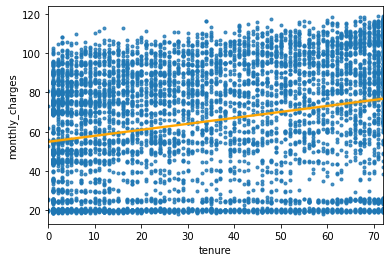

In [13]:
sns.regplot(data = churn, x="tenure" , y='monthly_charges' , marker=".", line_kws={'color' : "orange"})

plt.show()



In [14]:
r, p = stats.pearsonr(churn.tenure , churn.monthly_charges)
alpha = .05

In [15]:
r, p 

(0.24789985628615263, 4.0940449914811555e-99)

In [16]:
#a function for neat printout of results
def stat_result(r, p, alpha=0.05):
    if p < alpha:
        return print(f"""We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of {r:2f}.
P-value: {p}""")
    else:
        return print(f"""We fail to reject null hypothesis: that there is a linear relationship. Pearson’s r: {r:2f} P-value: {p}""")

In [18]:
#Reject the null hypo. Very low positive correlation.
stat_result(r, p)

We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of 0.247900.
P-value: 4.0940449914811555e-99


<function matplotlib.pyplot.show(close=None, block=None)>

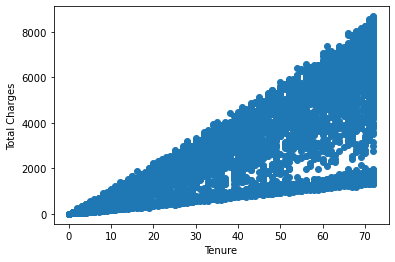

In [11]:
plt.scatter(churn.tenure , churn.total_charges)
plt.xlabel("Tenure")
plt.ylabel('Total Charges')
plt.show

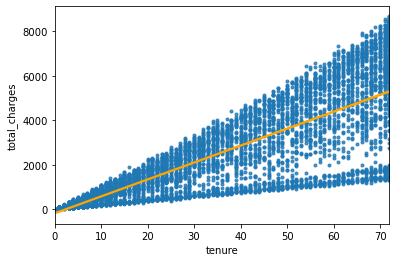

In [21]:
#a better looking vr of the above
sns.regplot(x='tenure', y = 'total_charges', data=churn, marker='.', line_kws={'color': 'orange'})
plt.show()

In [22]:
r, p = stats.pearsonr(churn.tenure , churn.total_charges)

In [23]:
r, p 

(0.8261783979021566, 0.0)

In [24]:
stat_result(r, p)

We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of 0.826178.
P-value: 0.0


In [ ]:
#  What happens if you control for phone and internet service?
# Null: There is no correlation between tenure and monthly charges of phone & internet customers
# Alt: There is a correlation between tenure and monthly charges of phone & internet customers

In [25]:
phone_df = churn[(churn.phone_service == "Yes") & (churn.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

In [27]:
phone_df.head()

,monthly_charges,tenure
0,65.60,9
1,59.90,9
5,69.40,9
8,48.20,7
9,90.45,65


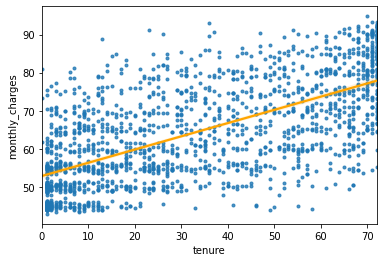

In [26]:
sns.regplot(data = phone_df, x="tenure" , y='monthly_charges', marker='.', line_kws={'color': 'orange'})

plt.show()

In [28]:
r,p = stats.pearsonr(phone_df.tenure, phone_df.monthly_charges)

In [29]:
r , p 

(0.6553845618157265, 5.676202683640689e-214)

In [30]:
stat_result(r, p)

We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of 0.655385.
P-value: 5.676202683640689e-214


In [ ]:
# Is there a relationship between how long an employee has been with the company and their salary?
# Null: There is no correlation between tenure and salary
# Alt: There is a correlation between tenure and salary

In [35]:
#departments = pd.read_sql("select * from salaries where to_date < curdate()", get_db_url("employees"))
departments = pd.read_sql('''
select * from (
    select 
        e.emp_no
        ,salary
        ,e.hire_date
        ,case when s.to_date = '9999-01-01' 
            then (select MAX(to_date) from salaries where to_date != '9999-01-01')
            else s.to_date
            end as to_date
        ,row_number() over(partition by e.emp_no, e.hire_date order by s.to_date DESC) rn
    from employees e
    join salaries s on s.emp_no = e.emp_no
 ) a where rn = 1;
        ''', get_db_url("employees"))

In [36]:
departments.head()

,emp_no,salary,hire_date,to_date,rn
0,10001,88958,1986-06-26,2002-08-01,1
1,10002,72527,1985-11-21,2002-08-01,1
2,10003,43311,1986-08-28,2002-08-01,1
3,10004,74057,1986-12-01,2002-08-01,1
4,10005,94692,1989-09-12,2002-08-01,1


In [39]:
departments["length_employment"] = (departments.to_date - departments.hire_date).astype(str).str.split(' ', expand = True)[0]
                                                           

In [40]:
departments.length_employment

0         5880
1         6097
2         5817
3         5722
4         4706
          ... 
300019    3488
300020    4326
300021    5946
300022    3214
300023    1705
Name: length_employment, Length: 300024, dtype: object

In [41]:
departments.length_employment = departments.length_employment.astype(int)

In [42]:
tenure_df = departments[["length_employment" , "salary"]]

In [43]:
tenure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   length_employment  300024 non-null  int64
 1   salary             300024 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


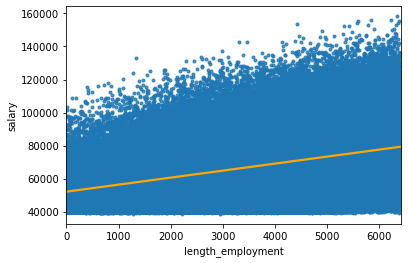

In [44]:
sns.regplot(x='length_employment', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [46]:
r,p = stats.pearsonr(tenure_df.length_employment, tenure_df.salary)
r,p

(0.36928933867675096, 0.0)

In [47]:
stat_result(r, p)

We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of 0.369289.
P-value: 0.0


In [ ]:
# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [54]:
emp_titles = pd.read_sql('''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
''', get_db_url("employees"))

In [55]:
emp_titles.head()

,emp_no,num_titles,tenure
0,10001,1,13443
1,10002,1,9752
2,10003,1,9996
3,10004,2,13285
4,10005,2,12269


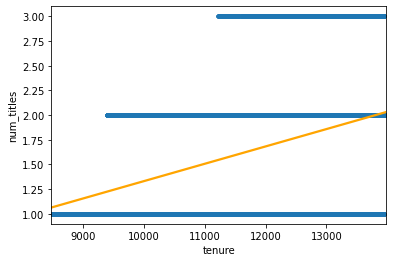

In [56]:
sns.regplot(x='tenure', y = 'num_titles', data=emp_titles, marker='.', line_kws={'color': 'orange'})
plt.show()

In [ ]:
"""Because the number of titles is a discrete value, we should run an ANOVA or a Kruskal Wallis test to test whether the average 
salary of those with 1 title is different from those with 2, or 2 different from 3, etc"""

In [61]:
# test for variance equality
stats.levene(emp_titles.num_titles, emp_titles.tenure)

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [ ]:
# variances are way different so use Kruskal Wallis test

<AxesSubplot:title={'center':'tenure'}, xlabel='num_titles'>

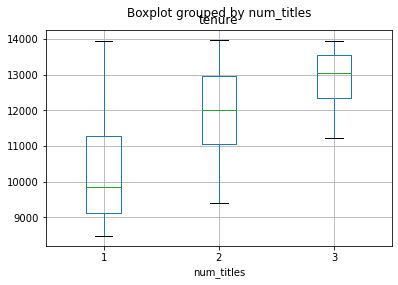

In [57]:
emp_titles.boxplot('tenure', by='num_titles')

In [59]:
stats.kruskal(emp_titles.num_titles, emp_titles.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

In [ ]:
# The null hypothesis is rejected. Tenure median is not equal for the various titles.

In [48]:
from pydataset import data 

In [49]:
sleepystudy = data("sleepstudy")

In [50]:
sleepystudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


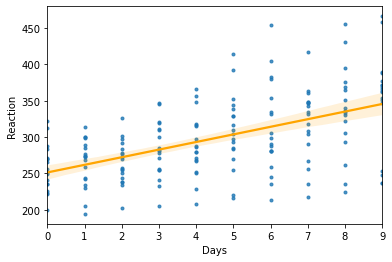

In [51]:
sns.regplot(data=sleepystudy, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.show()

In [52]:
r,p = stats.pearsonr(sleepystudy.Days, sleepystudy.Reaction)
r,p

(0.5352302262650253, 9.894096322214812e-15)

In [53]:
stat_result(r, p)

We reject the null hypothesis, there is a linear relationship with a Correlation Coefficient of 0.535230.
P-value: 9.894096322214812e-15


In [ ]:
#Chi2

In [ ]:
# Uses a Macbook: 49 20
# Doesn't Use A Macbook: 1 30
# Null: there is no association between being a codeup student and using a macbook 
# Alt: there is a association between being a codeup student and using a macbook

In [62]:
#make a df from the above by first making a list of list (array):
observed = [[49,20],[1,30]]
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [63]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [64]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 1.4116760526193828e-09


In [ ]:
#We reject the null hypothesis

In [ ]:
# There is no association between type of transmission and class of car
# There is an association between type of transmission and class of car 

In [24]:
mpg = data('mpg')

In [34]:
mpg["class"].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [31]:
mpg['is_automatic']=mpg.trans.str.contains("auto")

In [33]:
mpg.is_automatic.value_counts()

True     157
False     77
Name: is_automatic, dtype: int64

In [36]:
con_table = pd.crosstab(mpg.is_automatic , mpg["class"])
con_table

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
is_automatic,,,,,,,
False,3,23,12,0,13,19,7
True,2,24,29,11,20,16,55


In [93]:
chi2, p, degf, expected = stats.chi2_contingency(con_table)

In [88]:
print('Observed')
print(con_table.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 3 23 12  0 13 19  7]
 [ 2 24 29 11 20 16 55]]

Expected
[[ 1 15 13  3 10 11 20]
 [ 3 31 27  7 22 23 41]]

----
chi^2 = 33.7700
p     = 0.0000


In [ ]:
# we reject the null hypothesis

In [51]:
employees = pd.read_sql("select  employees.gender, departments.dept_name, employees.emp_no \
from departments \
join dept_emp on departments.dept_no = dept_emp.dept_no \
join employees on dept_emp.emp_no = employees.emp_no \
where dept_emp.to_date = '9999-01-01' and (departments.dept_name = 'Marketing' or departments.dept_name = 'Sales')\
group by employees.emp_no, employees.gender, departments.dept_name \
order by departments.dept_name ", get_db_url("employees"))

In [52]:
employees.head()

,gender,dept_name,emp_no
0,M,Marketing,437364
1,M,Marketing,437368
2,M,Marketing,437381
3,F,Marketing,437392
4,M,Marketing,437395


In [53]:
dep_gender = pd.crosstab(employees.gender , employees.dept_name)


In [54]:
dep_gender

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [94]:
chi2, p, degf, expected=stats.chi2_contingency(dep_gender)

In [95]:
print('Observed')
print(con_table.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 3 23 12  0 13 19  7]
 [ 2 24 29 11 20 16 55]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692


In [69]:
worker = pd.read_sql("select  employees.gender, employees.emp_no \
from departments \
join dept_emp on departments.dept_no = dept_emp.dept_no \
join employees on dept_emp.emp_no = employees.emp_no \
group by employees.emp_no, employees.gender \
;", get_db_url("employees"))

In [73]:
worker.head()

,gender,emp_no
0,F,10011
1,M,10038
2,F,10049
3,M,10060
4,F,10088


In [71]:
manager = pd.read_sql("select  employees.gender, dept_manager.emp_no as manager_number \
from departments \
join dept_emp on departments.dept_no = dept_emp.dept_no \
join employees on dept_emp.emp_no = employees.emp_no \
join dept_manager on employees.emp_no = dept_manager.emp_no \
group by employees.gender, manager_number \
;", get_db_url("employees"))

In [74]:
manager.head()

,gender,manager_number
0,M,110022
1,M,110039
2,M,110085
3,F,110114
4,F,110183


In [84]:
manager_gender = pd.concat([worker , manager], axis=0)

In [104]:
manager_gender

,gender,emp_no,manager_number
0,F,10011.0,NaN
1,M,10038.0,NaN
2,F,10049.0,NaN
3,M,10060.0,NaN
4,F,10088.0,NaN
...,...,...,...
19,F,NaN,111534.0
20,F,NaN,111692.0
21,F,NaN,111784.0
22,F,NaN,111877.0


In [121]:
manager_gender = manager_gender.fillna(0)

In [130]:
manager_gender

,gender,emp_no,manager_number,manager_yes
0,F,10011.0,0.0,NO
1,M,10038.0,0.0,NO
2,F,10049.0,0.0,NO
3,M,10060.0,0.0,NO
4,F,10088.0,0.0,NO
...,...,...,...,...
19,F,0.0,111534.0,YES
20,F,0.0,111692.0,YES
21,F,0.0,111784.0,YES
22,F,0.0,111877.0,YES


In [123]:
manager_gender["manager_yes"]= np.where(manager_gender.manager_number != 0, 'YES','NO')

In [124]:
manager_gender

,gender,emp_no,manager_number,manager_yes
0,F,10011.0,0.0,NO
1,M,10038.0,0.0,NO
2,F,10049.0,0.0,NO
3,M,10060.0,0.0,NO
4,F,10088.0,0.0,NO
...,...,...,...,...
19,F,0.0,111534.0,YES
20,F,0.0,111692.0,YES
21,F,0.0,111784.0,YES
22,F,0.0,111877.0,YES


In [125]:
manager_cross = pd.crosstab(manager_gender.gender , manager_gender.manager_yes)

In [126]:
manager_cross

manager_yes,NO,YES
gender,,
F,120051,13
M,179973,11


In [127]:
chi2, p, degf, expected = stats.chi2_contingency(manager_cross)


In [129]:
print('Observed')
print(manager_cross.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')


Observed
[[120051     13]
 [179973     11]]

Expected
[[120054      9]
 [179969     14]]

----
chi^2 = 1.4564
p     = 0.2275
